In [1]:
# Importing All dependencies to be Used

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
rng=np.random

In [4]:
# Building the Graph!


# Declaring Tensorflow variables and placeholders for Linear regression Model
# The equation of a line is : y=wx+b
# We will declare two tensorflow variables (w and b) and two tensorflow placeholders (x and y)

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

print (W)

<tf.Variable 'weight:0' shape=() dtype=float32_ref>


In [5]:
# Defining the Equation of Line

pred = tf.add(tf.multiply(X, W), b)  # Equivalent to : pred_y=wx+b

# Defining the Loss ( Mean Squared Error )
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Defining the Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# Initializing all variables
init=tf.global_variables_initializer()

# End Defining the Graph! 


Epoch: 0050 cost= 0.128921956 W= 0.12256251 b= 1.7153189
Epoch: 0100 cost= 0.122939065 W= 0.13011767 b= 1.6609676
Epoch: 0150 cost= 0.117645971 W= 0.13722356 b= 1.6098485
Epoch: 0200 cost= 0.112963147 W= 0.14390686 b= 1.5617692
Epoch: 0250 cost= 0.108820379 W= 0.15019251 b= 1.5165509
Epoch: 0300 cost= 0.105155334 W= 0.156104 b= 1.4740237
Epoch: 0350 cost= 0.101912677 W= 0.1616642 b= 1.4340245
Epoch: 0400 cost= 0.099043824 W= 0.16689354 b= 1.3964046
Epoch: 0450 cost= 0.096505471 W= 0.17181215 b= 1.3610202
Epoch: 0500 cost= 0.094259650 W= 0.17643844 b= 1.3277395
Epoch: 0550 cost= 0.092272647 W= 0.18078944 b= 1.2964386
Epoch: 0600 cost= 0.090514585 W= 0.18488173 b= 1.2669985
Epoch: 0650 cost= 0.088959016 W= 0.18873085 b= 1.2393084
Epoch: 0700 cost= 0.087582655 W= 0.19235107 b= 1.2132647
Epoch: 0750 cost= 0.086365111 W= 0.19575533 b= 1.1887751
Epoch: 0800 cost= 0.085287824 W= 0.19895689 b= 1.1657431
Epoch: 0850 cost= 0.084334590 W= 0.20196816 b= 1.1440803
Epoch: 0900 cost= 0.083490998 W= 0

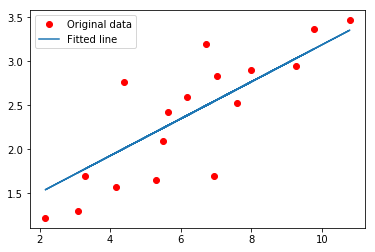

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(1000):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % 50 == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()